# Business Understanding
- The company is diversifying its portfolio by entering the aviation industry, aiming to purchase and operate airplanes for both commercial and private use. To support this expansion, it is critical to assess the risks associated with different aircraft. The objective is to identify the aircraft models and manufacturers with the lowest risks, analyze factors contributing to accidents, and provide actionable insights to guide the aviation division's purchasing decisions.

# Objectives:

1. To identify aircraft models with the highest and lowest accident risks.
2. Analyze trends in aviation accidents to understand risk changes for specific aircraft models over time.
3. Assess operational factors affecting accident risks for different aircraft models to improve safety decisions.
    

# Import Libraries 

In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.io as pio

pio.renderers.default = "svg"

# Display all columns(max of 50 columns: this number is abitrary)
pd.set_option("display.max_columns", 50)

In [2]:
# Import dataset 
df = pd.read_csv(r"/home/western/Documents/Data/AviationData.csv", encoding='latin1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Dataframe info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Subset to work with selected rows
- Select the top 100 countries with airplane accidents and incidents 

In [4]:
# Get the top 100 countries by accident and incident 
top_countries = df['Country'].value_counts().index[:100]

# Filter to only include rows where country is in top 100 list  
df = df[df['Country'].isin(top_countries)]

# Remove rows wheer country is blank
df = df[df['Country'].notna() & df['Country'].str.strip() !=""]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 88312 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88312 non-null  object 
 1   Investigation.Type      88312 non-null  object 
 2   Accident.Number         88312 non-null  object 
 3   Event.Date              88312 non-null  object 
 4   Location                88274 non-null  object 
 5   Country                 88312 non-null  object 
 6   Latitude                34263 non-null  object 
 7   Longitude               34254 non-null  object 
 8   Airport.Code            50003 non-null  object 
 9   Airport.Name            52559 non-null  object 
 10  Injury.Severity         87369 non-null  object 
 11  Aircraft.damage         85195 non-null  object 
 12  Aircraft.Category       32093 non-null  object 
 13  Registration.Number     87017 non-null  object 
 14  Make                    88252 non-null  obj

# Data Cleaning 

### Check for duplicates 

In [5]:
df.duplicated().sum()


0

- **Observations**
    1. There are no duplicated rows in the dataframe

### Parse correct dtypes


In [6]:
# Convert Event.Date to a datetime format

df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce', dayfirst=False)


## Checking for Null values 
- The dataset had missing values


In [7]:
# Missing values 
missing_entries = df.isnull().sum()

# Calculate percentages 
percent_missing_records = (missing_entries / len(df)) * 100

missing_records_df = pd.DataFrame({
    'missing_entries': missing_entries,
    'percentage (%)': percent_missing_records
})

missing_records_df[4:9]

,missing_entries,percentage (%)
Location,38,0.043029
Country,0,0.000000
Latitude,54049,61.202328
Longitude,54058,61.212519
Airport.Code,38309,43.379156


### Dropping columns
- Dropped all columns with missing values greater than 60%. Imputing these columns would result in data skewness.
- Some columns are irrelavant within the confines of the objectives and were dropped
- Drop location and use country instead

In [8]:
# Drop columns 
df = df.drop(columns=['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description',
                      'Schedule', 'Air.carrier', 'Airport.Code', 'Airport.Name', 
                      'Publication.Date', 'Registration.Number', 'Report.Status', 'Location' 
                     ], errors='ignore')


## Imputation 
- Impute missing values based on probability distribution of existing categories or columns 
- This preserves variability of the data unlike deterministic methods reducing bias in downstream analysis 
- For numeric variables, missing values are sampled from distribution of observed data 
- For categorical variables, missing values are sampled based on observed frequency distribution


### Imputation of categorical columns 

In [9]:

# List of categorical columns for imputation (removing duplicate 'Broad.phase.of.flight')
categorical_columns = [
    'Aircraft.damage', 'Engine.Type', 'Purpose.of.flight', 
    'Weather.Condition', 'Broad.phase.of.flight',
    'Make', 'Model', 'Amateur.Built'
]


def probabilistic_imputation(series, prob_dist, random_state=None):
    # Set the random state for reproducibility
    rng = np.random.default_rng(random_state)
    
    # Ensure the probability distribution sums to 1
    prob_dist = prob_dist / prob_dist.sum()
    
    # Identify missing values
    missing_indices = series[series.isna()].index
    
    # Sample replacement values based on the probability distribution
    sampled_values = rng.choice(prob_dist.index, size=len(missing_indices), p=prob_dist.values)
    
    # Create a copy of the series and update missing values
    series = series.copy()  # Avoid working on a slice directly
    series.loc[missing_indices] = sampled_values
    
    return series


# Perform probabilistic imputation on each column
for column in categorical_columns:
    # Calculate the probability distribution of non-missing values
    prob_distribution = df[column].value_counts(normalize=True)
    
    # Impute missing values using the probabilistic imputation function
    df[column] = probabilistic_imputation(df[column], prob_distribution, random_state=42)




### Imputing numerical columns

In [10]:
# List of numeric columns for imputation
numeric_columns = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Number.of.Engines'
]

# Function for probabilistic imputation on numeric columns
def probabilistic_numeric_imputation(series, random_state=None):
    # Set random state for reproducibility
    rng = np.random.default_rng(random_state)
    
    # Remove NaNs and get existing values
    existing_values = series.dropna().values
    
    # Identify missing values
    missing_indices = series[series.isna()].index
    
    # Sample replacement values from existing values
    sampled_values = rng.choice(existing_values, size=len(missing_indices))
    
    # Create a copy of the series and update missing values
    series = series.copy()
    series.loc[missing_indices] = sampled_values
    
    return series

# Apply probabilistic imputation on numeric columns
for column in numeric_columns:
    df[column] = probabilistic_numeric_imputation(df[column], random_state=42)

# Check the result
print(df.isna().sum())  # Should show 0 for the specified numeric columns if all missing values are imputed

    

Event.Id                    0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Country                     0
Injury.Severity           943
Aircraft.damage             0
Make                        0
Model                       0
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Broad.phase.of.flight       0
dtype: int64


In [11]:
df.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88312,88312.000000,88312.000000,88312.000000,88312.000000,88312.000000
mean,1999-09-13 02:24:30.133164160,1.145156,0.635587,0.280573,0.353316,5.300967
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989-01-09 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1998-07-16 12:00:00,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2009-06-26 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000
std,NaN,0.444267,5.484540,1.581799,2.130435,27.981725


### Replace values in columns 

In [12]:
# Replace values in 'Weather.Condition', 'Engine.Type'

df['Weather.Condition'] = df['Weather.Condition'].replace(to_replace=['UNK', 'Unk'], value='Unknown', regex=False)
df['Engine.Type'] = df['Engine.Type'].replace(to_replace=['UNK', 'Unk', 'NONE'], value='Unknown', regex=False)


In [13]:
# Ensure 'Total.Fatal.Injuries' is 0 where 'Injury.Severity' is 'Non-Fatal'
df.loc[df['Injury.Severity'] == 'Non-Fatal', 'Total.Fatal.Injuries'] = 0

# Drop the 'Injury.Severity' column
df = df.drop(columns=['Injury.Severity'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88312 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88312 non-null  object        
 1   Investigation.Type      88312 non-null  object        
 2   Accident.Number         88312 non-null  object        
 3   Event.Date              88312 non-null  datetime64[ns]
 4   Country                 88312 non-null  object        
 5   Aircraft.damage         88312 non-null  object        
 6   Make                    88312 non-null  object        
 7   Model                   88312 non-null  object        
 8   Amateur.Built           88312 non-null  object        
 9   Number.of.Engines       88312 non-null  float64       
 10  Engine.Type             88312 non-null  object        
 11  Purpose.of.flight       88312 non-null  object        
 12  Total.Fatal.Injuries    88312 non-null  float64    

# Feature Engineering 
- Adding new columns to enhance exploratory data analysis 

### Create seasons columns 
- Create season categories e.g winter, spring, etc
- This helps identify trends over time such as seasonal variations in accident rates 

In [15]:
# Create a function to categorize seasons 
def get_seasons(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
        
    else:
        return 'Autum'
    
# Apply function 
df['Season'] = df['Event.Date'].apply(get_seasons)

### Damage severity index

In [16]:
# Create dictionary to map aircraft damage 
damage_severity = {
    'Destroyed': 3,
    'Substantial': 4,
    'Minor': 2,
    'Unknown': 1,
}

# Apply mapping 
df['aircraft_damage_severity'] = df['Aircraft.damage'].map(damage_severity)

### Injury severity index

In [17]:
# Injury severity 

df['injury_severity_index'] = (df['Total.Fatal.Injuries'] * 3) + (df['Total.Serious.Injuries'] * 2) + (df['Total.Minor.Injuries'] * 1)

In [18]:
df['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other'],
      dtype=object)

In [19]:
# Convert column names in the DataFrame to lowercase and replace '.' with '_'
df.columns = [col.lower().replace('.', '_') for col in df.columns]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 88312 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   event_id                  88312 non-null  object        
 1   investigation_type        88312 non-null  object        
 2   accident_number           88312 non-null  object        
 3   event_date                88312 non-null  datetime64[ns]
 4   country                   88312 non-null  object        
 5   aircraft_damage           88312 non-null  object        
 6   make                      88312 non-null  object        
 7   model                     88312 non-null  object        
 8   amateur_built             88312 non-null  object        
 9   number_of_engines         88312 non-null  float64       
 10  engine_type               88312 non-null  object        
 11  purpose_of_flight         88312 non-null  object        
 12  total_fatal_injuries   

# Univariate Analysis

**1. Top 5 countries with most accidents**
- Rank countries with most accidents 

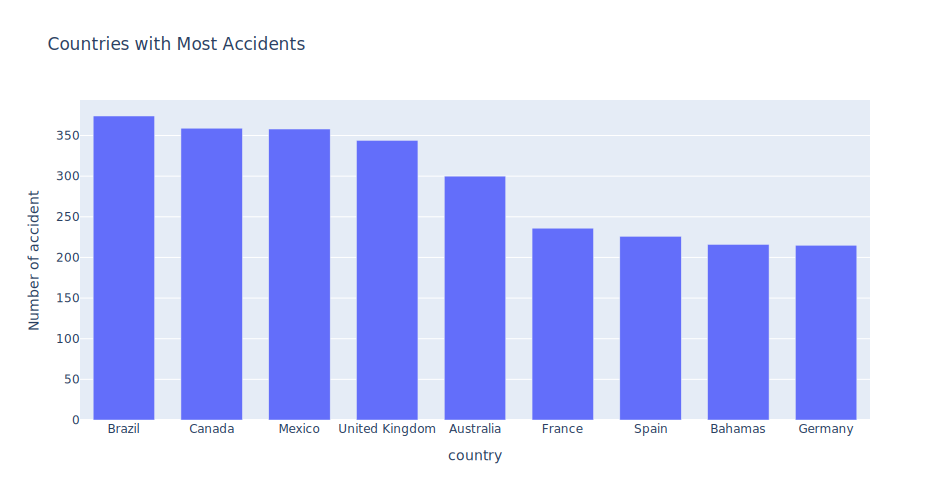

Excluded the first country USA (82248 incidents) to fit the countries on scale


In [29]:
countries = df['country'].value_counts().reset_index(name="Number of accident")[1:10]

# Plot bar graph 
fig = px.bar(countries, 
             x= 'country', 
             y = "Number of accident",
            title = 'Countries with Most Accidents')

# Update layout 
fig.update_layout(
    width = 950,
    height = 500, 
    bargap = 0.3
)
fig.show()

print('Excluded the first country USA (82248 incidents) to fit the countries on scale')

2. Aircraft make with most accidents 
- Rank aircraft make with most accidents 

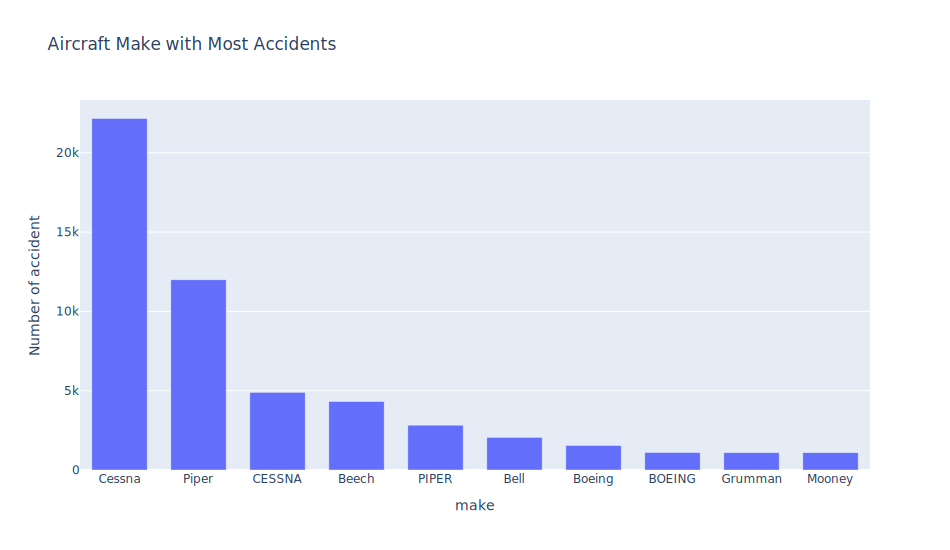

In [21]:

aircraft_make = df['make'].value_counts().reset_index(name="Number of accident")[:10]

# Plot bar graph 
fig = px.bar(aircraft_make, 
             x= 'make', 
             y = "Number of accident",
            title = 'Aircraft Make with Most Accidents', )

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3
)
fig.show()

### broad_phase_of_flight accidents 

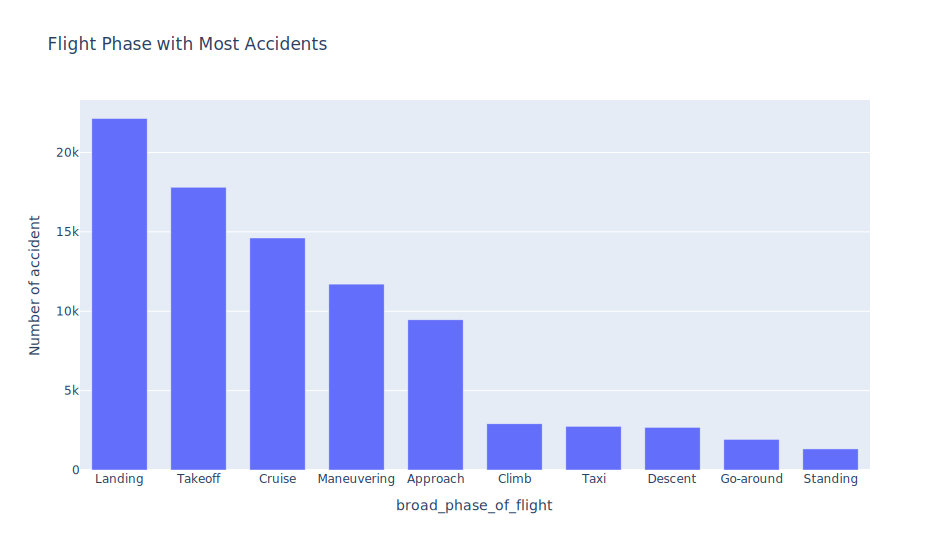

In [22]:
flight_phase = df['broad_phase_of_flight'].value_counts().reset_index(name="Number of accident")[:10]

# Plot bar graph 
fig = px.bar(flight_phase, 
             x= 'broad_phase_of_flight', 
             y = "Number of accident",
            title = 'Flight Phase with Most Accidents', )

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3
)
fig.show()

### Amature Built accidents 

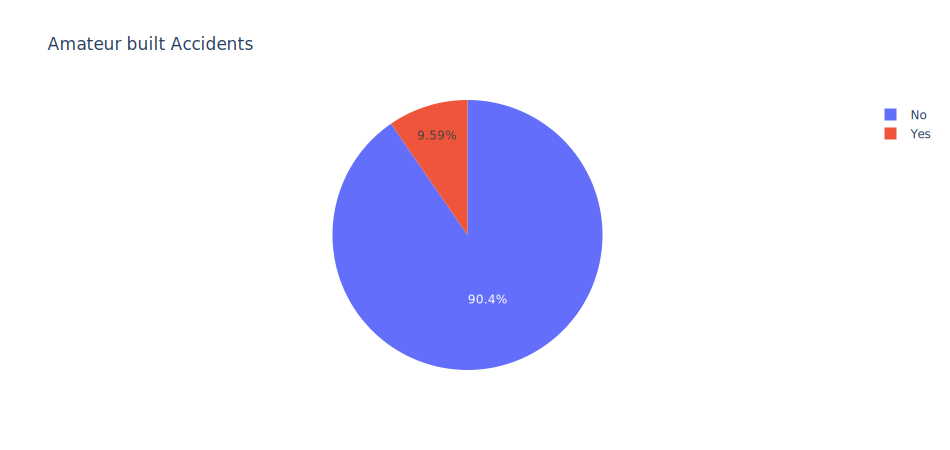

In [23]:
### Amature Built accidents 
ameteur_built = df['amateur_built'].value_counts().reset_index(name="Number of accident")

# Plot bar graph 
fig = px.pie(ameteur_built, 
             names = 'amateur_built', 
             values = "Number of accident",
            title = 'Amateur built Accidents')

# Update layout 
fig.update_layout(
    width = 950,
    height = 450, 
    bargap = 0.3
)
fig.show()


### Weather conditions


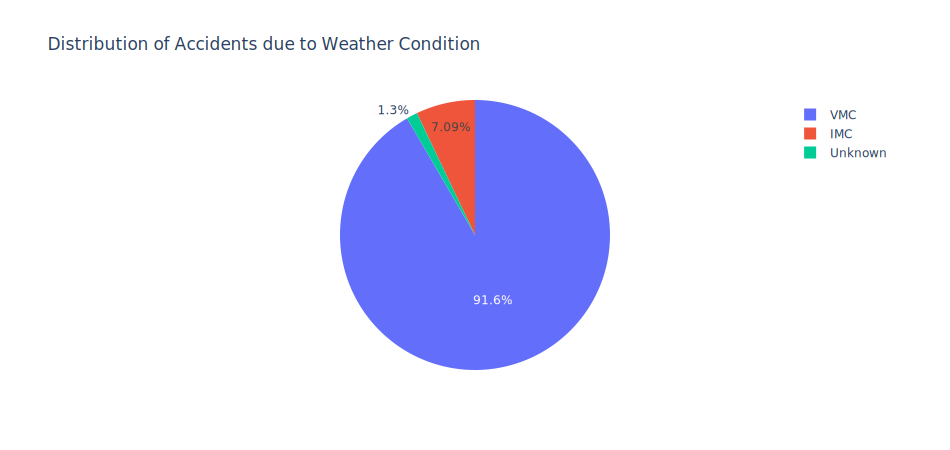

In [24]:
### Amature Built accidents 
ameteur_built = df['weather_condition'].value_counts().reset_index(name="Number of accident")

# Plot bar graph 
fig = px.pie(ameteur_built, 
             names = 'weather_condition', 
             values = "Number of accident",
            title = 'Distribution of Accidents due to Weather Condition')

# Update layout 
fig.update_layout(
    width = 950,
    height = 450, 
    bargap = 0.3
)
fig.show()


### Engine types

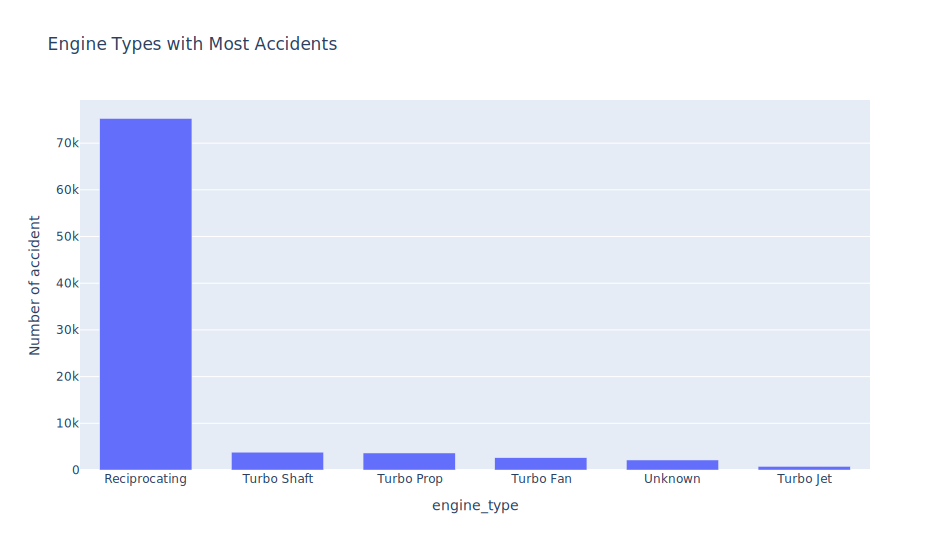

In [25]:
engine_types = df['engine_type'].value_counts().reset_index(name="Number of accident")[:6]

# Plot bar graph 
fig = px.bar(engine_types, 
             x= 'engine_type', 
             y = "Number of accident",
            title = 'Engine Types with Most Accidents', )

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3
)
fig.show()

### Seasons with most accidents 

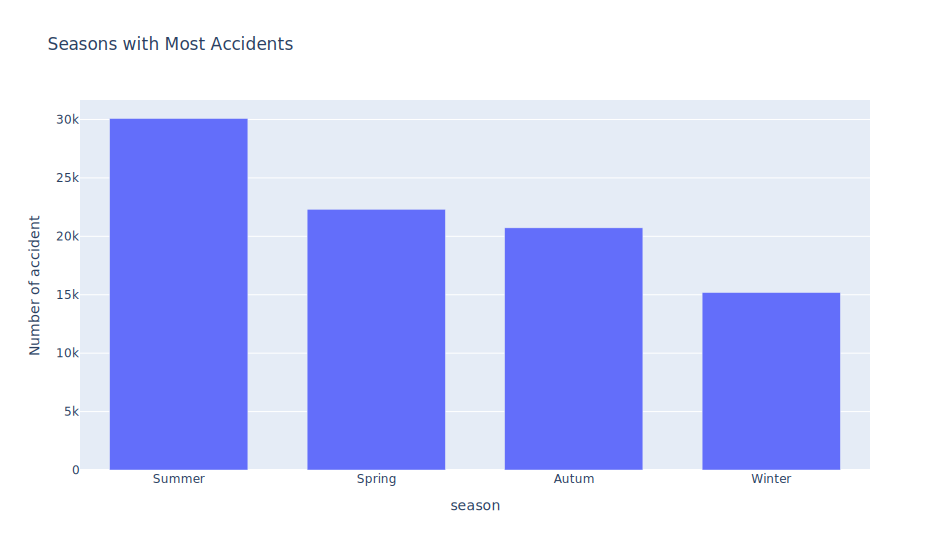

In [26]:
seasons = df['season'].value_counts().reset_index(name="Number of accident")[:6]

# Plot bar graph 
fig = px.bar(seasons, 
             x= 'season', 
             y = "Number of accident",
            title = 'Seasons with Most Accidents')

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3
)
fig.show()

### Exploring the purpose of flights involved in accidents

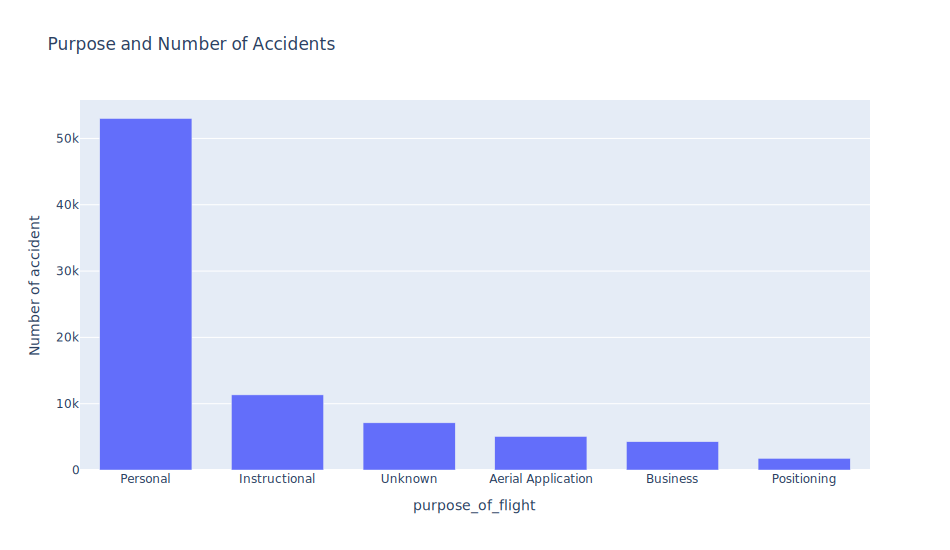

In [28]:
# Exploring the purpose of flights involved in accidents

top_10_purposes = df['purpose_of_flight'].value_counts().reset_index(name="Number of accident")[:6]

# Plot bar graph 
fig = px.bar(top_10_purposes, 
             x= 'purpose_of_flight', 
             y = "Number of accident",
            title = 'Purpose and Number of Accidents')

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3
)
fig.show()


plt.show()

In [ ]:
df.info()

In [ ]:
# Bivariate Analysis 